In [1]:
!pip install catboost xgboost scikit-learn matplotlib seaborn joblib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [2]:
# Импортируем стандартные библиотеки

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем класс линейной регрессии из библиотеки scikit-learn
from sklearn.linear_model import LinearRegression

# Функция для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт модели случайного леса для задачи регрессии.
# RandomForestRegressor — это ансамблевая модель, которая объединяет множество решающих деревьев.
# Она хорошо работает при наличии нелинейных зависимостей и устойчиво справляется с переобучением.
from sklearn.ensemble import RandomForestRegressor

# Импорт функции для разделения выборки на обучающую и тестовую части.
# train_test_split помогает случайным образом разбить данные на тренировочные и тестовые,
# чтобы можно было обучить модель и оценить её качество на "новых" данных.
from sklearn.model_selection import train_test_split

# Генерация полиномиальных и перекрёстных признаков (например, x², x1*x2 и т.д.) для учёта нелинейных зависимостей
from sklearn.preprocessing import PolynomialFeatures

# Заполнение пропущенных значений в данных (например, средним, медианой или наиболее частым значением)
from sklearn.impute import SimpleImputer

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# HistGradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# AdaBoostRegressor
from sklearn.ensemble import  AdaBoostRegressor

# XGBoost
from xgboost import XGBRegressor

# CatBoost
from catboost import CatBoostRegressor

# Метрики для оценки качества модели:
# - среднеквадратичная ошибка (MSE)
# - коэффициент детерминации (R²)
# - средняя абсолютная ошибка (MAE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# === Загружаем Датасет ===
df = pd.read_excel("/content/sample_data/1.xlsx")
df = df.drop_duplicates()
print(f"Размерность набора данных: {df.shape}")
display(df.head())
df.info()

# Альтернативный способ загрузки данных для ментора, если возникают проблемы с загрузкой файла
# Excel = 'https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'
# df = pd.read_excel(Excel)

Размерность набора данных: (1001, 214)


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [5]:
RANDOM_STATE = 123

In [6]:
target = 'CC50, mM'
X = df.drop(['Unnamed: 0','IC50, mM', 'CC50, mM', 'SI'], axis=1) # Удаляем целевую и связанные переменные
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [8]:
print("Топ-10 дескрипторов для IC50:")
feature_importances.head(10)

Топ-10 дескрипторов для IC50:


,0
Chi1,0.096628
Kappa2,0.057268
LabuteASA,0.050829
BCUT2D_MWLOW,0.045647
FpDensityMorgan1,0.030224
Kappa3,0.026649
Chi1n,0.025900
BCUT2D_MRLOW,0.024828
SPS,0.023210
BCUT2D_CHGLO,0.021536


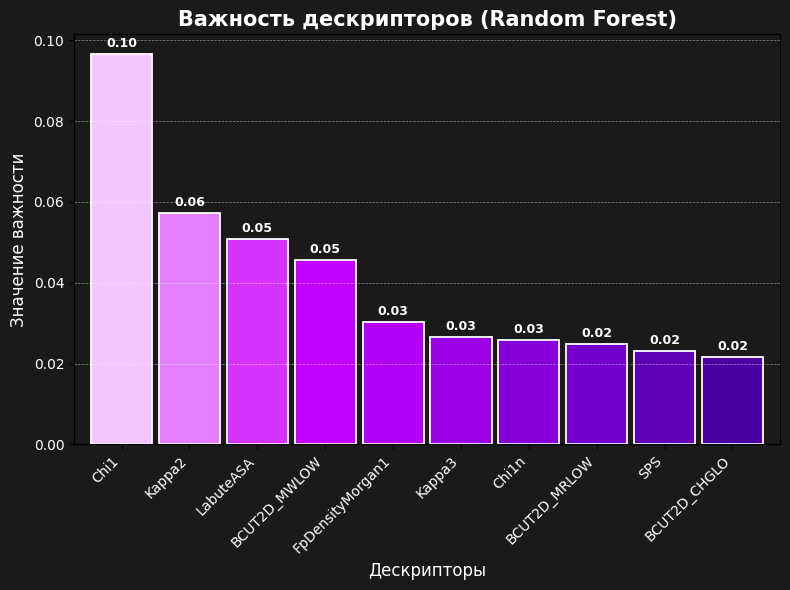

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Ярко-фиолетовая неоновая палитра (10 оттенков)
neon_purples_bright = [
    '#f3c6ff', '#e480ff', '#d633ff', '#c300ff', '#b100f5',
    '#9b00e6', '#8700d9', '#7300cc', '#5f00b8', '#4b00a3'
]

plt.figure(figsize=(8, 6))

# Построение стильного столбчатого графика
ax = feature_importances.head(10).plot(
    kind='bar',
    width=0.9,
    color=neon_purples_bright[:10],
    alpha=1,
    edgecolor='white',
    linewidth=1.3
)

# Добавление надписей над столбцами
for i, v in enumerate(feature_importances.head(10)):
    ax.text(i, v + feature_importances.head(10).max() * 0.01,
            f"{v:.2f}", ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='white')

# Стилизация тёмного фона в клубной эстетике
ax.set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

# Заголовки и подписи
plt.title('Важность дескрипторов (Random Forest)', fontsize=15,
          fontweight='bold', color='white')
plt.xlabel('Дескрипторы', fontsize=12, color='white')
plt.ylabel('Значение важности', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(axis='y', linestyle='--', linewidth=0.5,
         alpha=0.5, color='white')

plt.tight_layout()
plt.show()


Визуализация важности дескрипторов (Random Forest)
График показывает топ‑10 дескрипторов, ранжированных по важности, в модели RandomForestRegressor (построено на основе feature_importances_).

**Chi1** — лидер с самой высокой важностью (~0.10), указывающий на критическую роль топологического индекса в предсказании активности.

**Kappa2** (около 0.06) и **LabuteASA** (~0.05) также значимы, что подчёркивает важность геометрических и гидрофобных свойств.

**BCUT2D_MWHLOW, FpDensityMorgan1** (около 0.05 и 0.03) отражают вклад электрохимических свойств и фрагментной структуры молекул.

Другие дескрипторы (**Kappa3, Chi1n, BCUT2D_MRLOW, SPS, BCUT2D_CHGLO**) приносят менее весомый, но всё‑еще заметный вклад (~0.02–0.03).

📌 **Интерпретация:**

Высокая важность **Chi1 и Kappa2** говорит о ключевой роли топологии молекулы.

Значения **LabuteASA и BCUT2D **указывают на значимость поверхности и распределения заряда.

Комбинация разных типов дескрипторов подтверждает комплексный характер влияния на активность IC₅₀.



In [11]:
# Исключаем ненужные столбцы
cols_to_exclude = ['IC50, mM', 'CC50, mM', 'SI']
X = df.drop(columns=[col for col in cols_to_exclude if col in df.columns], errors='ignore')
y = df[target]

df_regress = X.copy()

# Добавление новых признаков молярный
df_regress['MolLogP_MolWt'] = df_regress['MolLogP'] * df_regress['MolWt']

In [12]:
# Полиномиальные признаки
existing_poly_cols = [col for col in ['MolLogP', 'MolWt'] if col in df_regress.columns]

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_regress[existing_poly_cols])
poly_feature_names = poly.get_feature_names_out(existing_poly_cols)

new_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_regress.index)
for col in new_poly_df.columns:
   if col not in df_regress.columns:
       df_regress[col] = new_poly_df[col]

In [14]:
df_regress['MolLogP_gt_3'] = (df_regress['MolLogP'] > 3).astype(int)

In [15]:
imputer = SimpleImputer(strategy='median')
df_regress = pd.DataFrame(imputer.fit_transform(df_regress), columns=df_regress.columns)

In [17]:
print("Новые признаки:", [col for col in df_regress.columns if col not in df.columns])

Новые признаки: ['MolLogP_MolWt', 'MolLogP^2', 'MolLogP MolWt', 'MolWt^2', 'MolLogP_gt_3']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_regress, y, test_size=0.2, random_state=RANDOM_STATE)

**KNN**

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
results = []
best_r2 = 0
best_model = ''

In [21]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'KNN',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)


**Random Forest**

In [22]:
model = RandomForestRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Random Forest',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
model = GradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Gradient Boosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**HistGradientBoosting**

In [25]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [26]:
model = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'HistGradientBoosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**AdaBoostRegressor**

In [27]:
from sklearn.ensemble import  AdaBoostRegressor

In [28]:
model = AdaBoostRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'AdaBoostRegressor',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**XGBoost**

In [29]:
from xgboost import XGBRegressor

In [30]:
model = XGBRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'XGBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

 **CatBoost**

In [31]:
from catboost import CatBoostRegressor

In [32]:
model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'CatBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

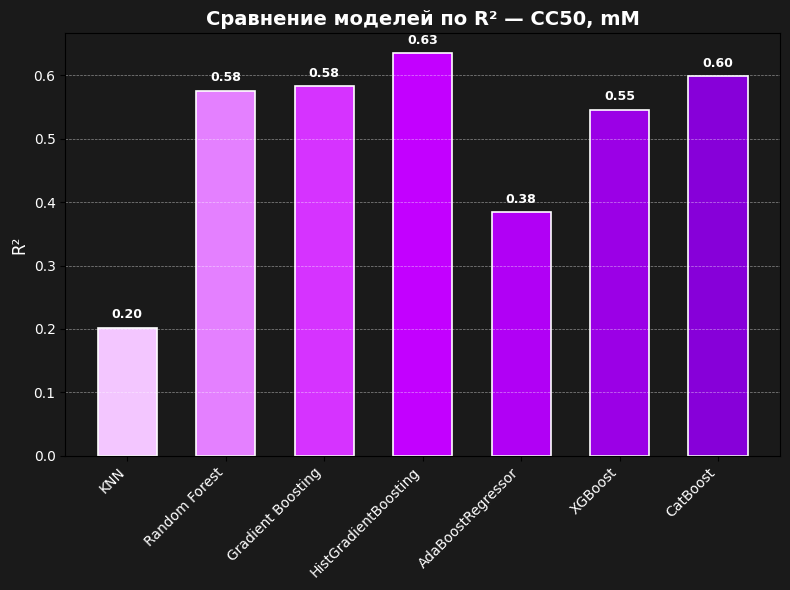

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Ярко-фиолетовая неоновая палитра (сколько нужно — столько и берём)
neon_purples_bright = [
    '#f3c6ff', '#e480ff', '#d633ff', '#c300ff',
    '#b100f5', '#9b00e6', '#8700d9'
]

plt.figure(figsize=(8, 6))

# Построение графика с индивидуальными цветами столбцов
bars = plt.bar(
    results_df['Model'],
    results_df['r2'],
    width=0.6,
    color=neon_purples_bright[:len(results_df)],
    edgecolor='white',
    linewidth=1.2
)

# Подписи над столбцами с значениями R²
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha='center', va='bottom',
        fontsize=9, color='white', fontweight='bold'
    )

# Оформление в неоновом стиле
plt.title(f'Сравнение моделей по R² — {target}', fontsize=14, fontweight='bold', color='white')
plt.ylabel('R²', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5, color='white')

# Тёмный фон для клубной атмосферы
ax = plt.gca()
ax.set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

plt.tight_layout()
plt.show()

# **Сравнение моделей по R² — CC₅₀, mM**

* **KNN:** R² ≈ 0.20 — средняя способность объяснять дисперсию.
* **Random Forest** и **Gradient Boosting:** R² ≈ 0.58 — высокий уровень предсказательной силы.
* HistGradientBoosting лидирует с R² ≈ 0.63 — лучшая модель по объяснению дисперсии.
* AdaBoostRegressor дал R² ≈ 0.38 — средний результат.
* XGBoost показал R² ≈ 0.55 — устойчивый высокий уровень.
* CatBoost почти повторяет лидеров с R² ≈ 0.60 — очень эффективна.

## **Краткий вывод**
* В задаче регрессии CC₅₀ наилучшие показатели R² показали HistGradientBoosting и CatBoost, что указывает на эффективность алгоритмов бустинга для предсказания биологической активности.



In [35]:
print(f"Результаты моделей (таргет: {target}):")

results_df

Результаты моделей (таргет: CC50, mM):


,Model,MSE,RMSE,MAE,r2
0,KNN,329130.739724,573.699172,427.787672,0.202105
1,Random Forest,174854.330334,418.155868,290.524837,0.576109
2,Gradient Boosting,171916.254416,414.627851,304.738134,0.583232
3,HistGradientBoosting,150649.531050,388.135970,278.924685,0.634788
4,AdaBoostRegressor,253871.254925,503.856383,434.282687,0.384553
5,XGBoost,187333.221960,432.820080,285.593407,0.545858
6,CatBoost,165651.136417,407.002625,278.048167,0.598420


**Выводы:**
* Лучший общий результат показывает **HistGradientBoosting**:
* Самое высокое качество по **R² (0.63)**,
* Наименьшие **MSE** и **RMSE**.
* Наиболее слабая модель для данной задачи — **KNN**: высокая ошибка и низкий **R²** (всего 0.20).
* **CatBoost** показывает наименьшую **MAE** (ошибку в абсолютных значениях), что может быть важно для интерпретации в фармацевтике.
* **Random Forest, Gradient Boosting и XGBoost** также дают достойные результаты, но немного уступают.



In [36]:
print(f"Наилучший результат \n{results_df[results_df['r2']==results_df['r2'].max()]}")

Наилучший результат 
                  Model           MSE       RMSE         MAE        r2
3  HistGradientBoosting  150649.53105  388.13597  278.924685  0.634788


In [38]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Модель для тюнинга
hgb = HistGradientBoostingRegressor(random_state=123)

# Сетка гиперпараметров для подбора
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'l2_regularization': [0.0, 0.1, 1.0]
}

# GridSearch с 5-кратной кросс-валидацией
grid_search = GridSearchCV(
    estimator=hgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # т.к. цель — минимизировать ошибку
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Обучение GridSearch
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка на тестовой выборке
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Метрики лучшей модели HistGradientBoosting:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 300}

📊 Метрики лучшей модели HistGradientBoosting:
MSE: 177368.49
RMSE: 421.15
MAE: 285.39
R²: 0.5700


* Модель **HistGradientBoosting** с оптимальными параметрами показала умеренное качество предсказаний для CC50:
* **MAE:** 285.39
* **RMSE:** 421.15
* **R²:** 0.57

* **Вывод:** после подбора гиперпараметров модель улавливает ключевые зависимости, но остаётся пространство для улучшения (например, за счёт расширения признаков или использования других моделей, таких как XGBoost или CatBoost).